In [1]:
import pandas as pd 
import numpy as np
from unidecode import unidecode
import re
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
#model = LinearRegression()
dataTotal = pd.read_csv("dadosBrutos/train.csv") 
dataTotal.head()

,title,label_quality,language,category
0,Hidrolavadora Lavor One 120 Bar 1700w Bomba A...,unreliable,spanish,ELECTRIC_PRESSURE_WASHERS
1,Placa De Sonido - Behringer Umc22,unreliable,spanish,SOUND_CARDS
2,Maquina De Lavar Electrolux 12 Kilos,unreliable,portuguese,WASHING_MACHINES
3,Par Disco De Freio Diant Vent Gol 8v 08/ Frema...,unreliable,portuguese,VEHICLE_BRAKE_DISCS
4,Flashes Led Pestañas Luminoso Falso Pestañas P...,unreliable,spanish,FALSE_EYELASHES


In [3]:
dataTotal.count()

title            20000000
label_quality    20000000
language         20000000
category         20000000
dtype: int64

In [4]:
dataTotal[dataTotal.language=='portuguese'].count()

title            10000000
label_quality    10000000
language         10000000
category         10000000
dtype: int64

In [5]:
dataTotal[dataTotal.language=='spanish'].count()

title            10000000
label_quality    10000000
language         10000000
category         10000000
dtype: int64

In [6]:
dataTotal[dataTotal.label_quality=='unreliable'].count()

title            18815755
label_quality    18815755
language         18815755
category         18815755
dtype: int64

In [7]:
dataTotal[dataTotal.label_quality=='reliable'].count()

title            1184245
label_quality    1184245
language         1184245
category         1184245
dtype: int64

In [50]:
#todos os titulos que contem as palavras
dataTotal['title'] = dataTotal['title'].str.upper() 
DataComFrete = dataTotal[(dataTotal.title.str.contains("FRETE GRATIS"))]
DataComFreteAcento=dataTotal[(dataTotal.title.str.contains("FRETE GRÁTIS"))]
DataComFreteEnvio = dataTotal[(dataTotal.title.str.contains("ENVIO GRATIS"))]
DataComBuenEstado= dataTotal[(dataTotal.title.str.contains("BUEN ESTADO"))]
DataComVariedaEnvio= dataTotal[(dataTotal.title.str.contains("VARIEDAD ENVIO"))]

In [51]:
#quantidade de categoria no total
arrayCategoriaUnica =pd.unique( dataTotal.category)
arrayCategoriaUnica.size


1588

In [52]:
#quantidade de titulos por categoria
def quantidaCategoria(dataFrameComCategoria):
    df = pd.DataFrame(columns=['QTD', 'Categoria'])
    for x in (arrayCategoriaUnica):  
       DataCountCategoria = dataFrameComCategoria[dataFrameComCategoria.category.str.contains(x)]
       qtdCategoria = DataCountCategoria.category.count()
       df = df.append({'QTD':qtdCategoria ,'Categoria' :x} , ignore_index=True) 
    df=df.sort_values(by=['QTD'])
    return df


DataQTDCategoriaComFrete = quantidaCategoria(DataComFrete)
DataQTDCategoriaDataComFreteAcento=quantidaCategoria(DataComFreteAcento)
DataQTDCategoriaDataComFreteEnvio=quantidaCategoria(DataComFreteEnvio)
DataQTDCategoriaDataComBuenEstado=quantidaCategoria(DataComBuenEstado)
DataQTDCategoriaDataComVariedaEnvio=quantidaCategoria(DataComVariedaEnvio)


In [75]:
#quantidade que a palavra x aconteceu 
tamanhoComFrete= (DataQTDCategoriaComFrete[DataQTDCategoriaComFrete.QTD!=0]).sum()
tamanhoComFreteAcento=(DataQTDCategoriaDataComFreteAcento[DataQTDCategoriaDataComFreteAcento.QTD!=0]).sum()
tamanhoComFreteEnvio=(DataQTDCategoriaDataComFreteEnvio[DataQTDCategoriaDataComFreteEnvio.QTD!=0]).sum()
tamanhoComBuenEstado=(DataQTDCategoriaDataComBuenEstado[DataQTDCategoriaDataComBuenEstado.QTD!=0]).sum()
tamanhoComVariedaEnvio= (DataQTDCategoriaDataComVariedaEnvio[DataQTDCategoriaDataComVariedaEnvio.QTD!=0]).sum()

In [79]:
print("Total score for %s %s  %s  %s  %s" % (tamanhoComFrete.QTD, tamanhoComFreteAcento.QTD,
                                    tamanhoComFreteEnvio.QTD,tamanhoComBuenEstado.QTD,
                                    tamanhoComVariedaEnvio.QTD))

Total score for 46506 106974  49368  21574  0.0


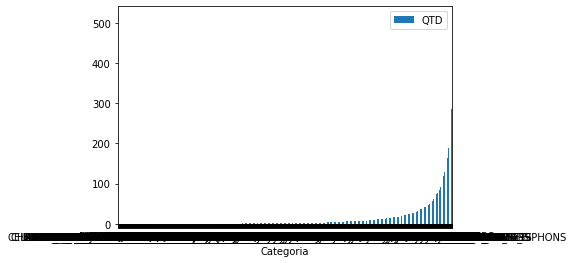

In [65]:
ax = DataQTDCategoriaDataComBuenEstado.plot.bar(x='Categoria', y='QTD', rot=0)

In [74]:
#DataQTDCategoriaComFrete.sort_values(by=['QTD'], ascending=False ).head(20)
DataQTDCategoriaDataComFreteAcento.sort_values(by=['QTD'], ascending=False ).head(20)
#DataQTDCategoriaDataComFreteEnvio.sort_values(by=['QTD'], ascending=False ).head(20)
#DataQTDCategoriaDataComBuenEstado.sort_values(by=['QTD'], ascending=False ).head(20)
#DataQTDCategoriaDataComVariedaEnvio.sort_values(by=['QTD'], ascending=False ).head(20)


,QTD,Categoria
865,1740,BELTS
1366,1525,TREADMILL_RUNNING_BELTS
568,1028,SUITS
307,914,VIDEO_GAMES
1382,854,LAPTOP_SKINS
624,839,SHIRTS
773,778,EROTIC_CREAMS
529,769,MALE_MASTURBATORS
746,760,GAME_CONSOLE_AND_VIDEO_GAME_CONTROLLER_SKINS
676,750,RUM


In [ ]:
DataQTDCategoriaComFrete 
DataQTDCategoriaDataComFreteAcento
DataQTDCategoriaDataComFreteEnvio
DataQTDCategoriaDataComBuenEstado
DataQTDCategoriaDataComVariedaEnvio
